<a href="https://colab.research.google.com/github/Charanpoojary/TRANSPORT-AND-DEMAND-PREDICTION/blob/main/Demand_Prediction_for_Public_Transport_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [ ]:
## importing libraries
import pandas as pd # importing pandas library
import numpy as np # importing numpy library
import seaborn as sns
import matplotlib.pyplot as plt # importing visualisation library
%matplotlib inline
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# dataset       
df = pd.read_csv(r'/content/drive/MyDrive/Datasets/train_revised.csv',encoding='latin1')
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
df.tail() # returns the last 5 rows of the dataframe

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


**DATASET OPERATIONS** 

In [ ]:
df.shape # returns the total rows and columns of the dataset

In [ ]:
df.info() # returns all the information about the dataset

In [ ]:
df.describe() # returns the informations about the numerical columns

In [ ]:
df.describe(include='object')

In [ ]:
# summary of the dataframe that we got from df.describe()
# there are 61 unique seats in the dataset
# travelers have used 2 types of payment method and most of the people have used Mpesa to pay for their ticket.
#There are 2 different types of car and most of them are bus

In [ ]:
df.isnull().sum() # checking the null values in each columns

In [ ]:
# so there is no null values in our dataset

In [ ]:
len(df['ride_id'].unique()) # there are 6249 id's are present

In [ ]:
column = list(df.columns)
column # list of column that we are having in our dataset

**EDA**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


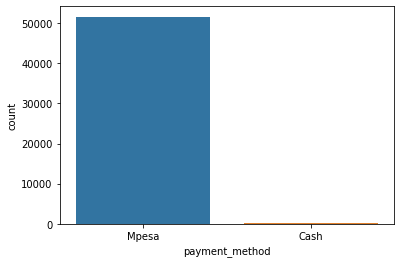

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


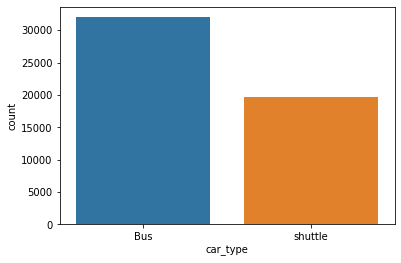

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


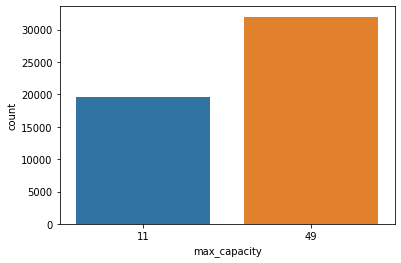

In [ ]:
# analysing different varibles
plot_count_cols = ['payment_method','car_type','max_capacity']
for plots in plot_count_cols:
  sns.countplot(df[plots])
  plt.show()

In [ ]:
# summary
#There are two type of payment methods people have used to buy the tickets.

#There are two type of cars Bus and shuttle and the maximum capacity of the bus is 49 while shuttle can contain 11 travelers

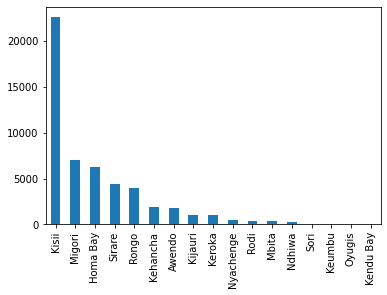

In [ ]:
#initial point operations
df['travel_from'].value_counts().plot(kind='bar')
plt.show()

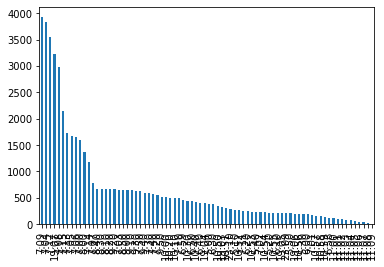

In [ ]:
## initial time of the ride when it begins
df['travel_time'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
# checking the correlation of the numerical variables
df.corr()

,ride_id,max_capacity
ride_id,1.000000,0.295902
max_capacity,0.295902,1.000000


**TARGET VARIABLE**

In [ ]:
# WE don't have target varible so we need to find it first

In [ ]:
easy_data=df.groupby(["ride_id"]).seat_number.count().rename("number_of_ticket").reset_index()
easy_data


,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31
...,...,...
6244,20113,9
6245,20114,4
6246,20115,5
6247,20116,1


In [ ]:
# number of ticket is our target varible now

In [ ]:
dataset=df.drop_duplicates("ride_id")  # deleting duplicates

In [ ]:
dataset.shape

(6249, 10)

In [ ]:
#now merging our dataset and easy_data
my_data = dataset.merge(easy_data, how="left",on="ride_id")
my_data.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


In [ ]:
my_data.shape

(6249, 11)

In [ ]:
# my_data is our final dataset 
# Now we have found our final dataset so let us remove some features that doesn't seem to be important for predicting the number of tickets in our model

In [ ]:
my_data = my_data.drop(['seat_number','payment_method','payment_receipt'], axis=1)

In [ ]:
my_data.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,27-11-17,7:12,Migori,Nairobi,Bus,49,31


In [ ]:
# we know that (travel_to) column is constant here which has same value for entire column so we can remove that as well


In [ ]:
my_data.drop(["travel_to"],axis=1,inplace=True)

In [ ]:
my_data.shape

(6249, 7)

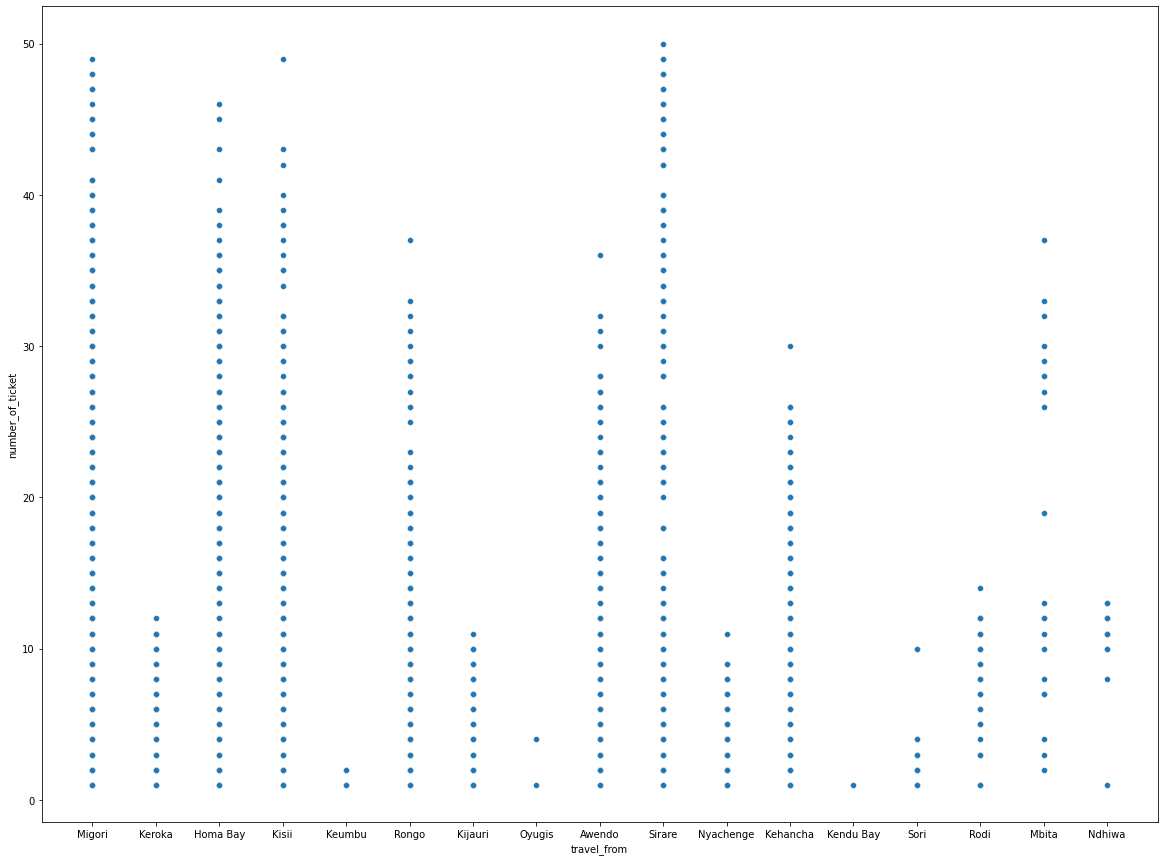

In [ ]:
plt.figure(figsize=(20, 15))

sp = sns.scatterplot(x="travel_from", y="number_of_ticket", data=my_data)

### **Feature Engineering**

In [ ]:
#concatinate travel date and travel time column and make a new feature called date.
my_data["date"]=my_data["travel_date"]+ " "+my_data["travel_time"]

In [ ]:
def  time_features(df): 

  '''This function takes dataframe as an argument and extracts the
  different features from the date variable of the dataset and finaly returns the updated 
  dataset'''
  
  df["date"]=pd.to_datetime(df["date"])
  df["day_of_week"]=df["date"].dt.dayofweek
  df["day_of_year"]=df["date"].dt.dayofyear
  df["day_of_month"]=df["date"].dt.day
  df["year_woy"]=df["date"].dt.year.astype(str)+df["date"].dt.weekofyear.astype(str)
  df["hour"]=df["date"].dt.hour
  df["minute"]=df["date"].dt.minute
  df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
  df["year"]=df["date"].dt.year
  df["quarter"]=df["date"].dt.quarter
  df["month"]=df["date"].dt.month
  return df

In [ ]:
ready_data= time_features(my_data) # calling the fucntion on my_data(present dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
ready_data.head() # present dataset

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month
0,1442,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10
1,5437,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11
2,5710,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11
4,5778,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11


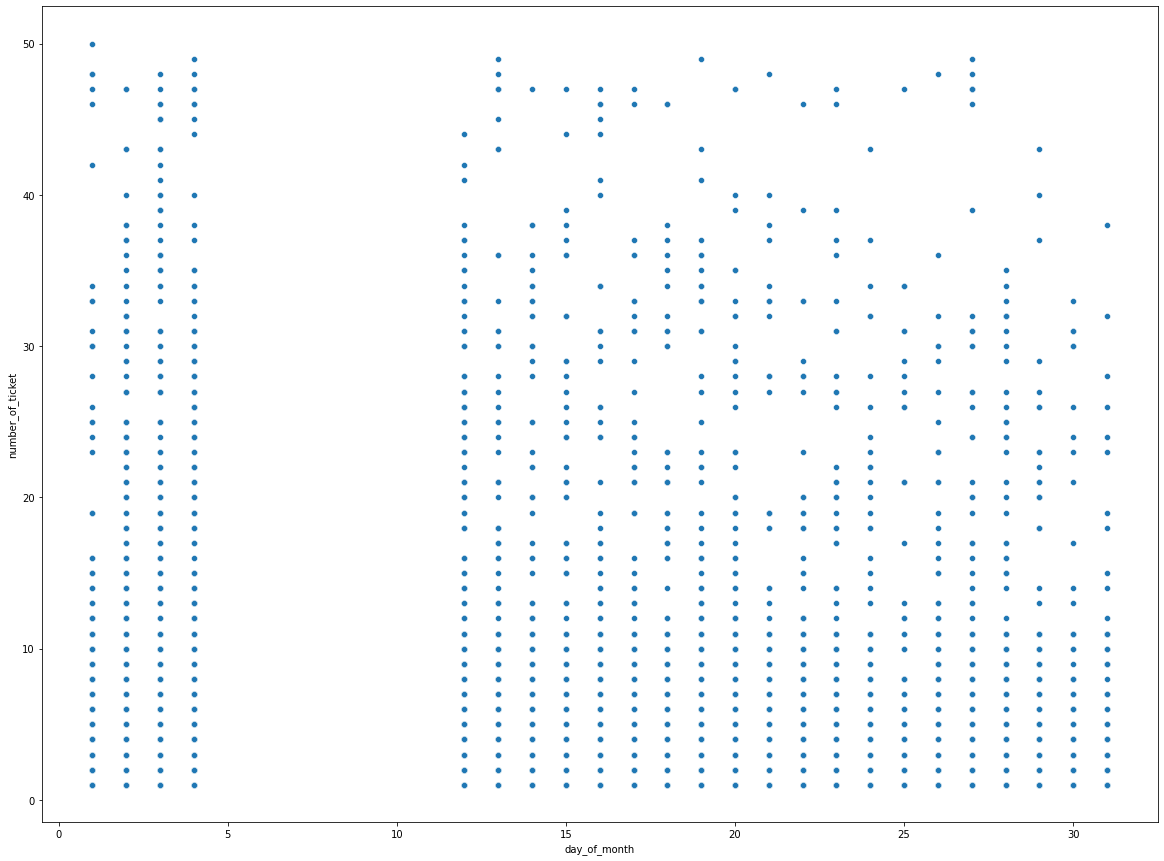

In [ ]:
#visualization of day_of_month & number_of_ticket using scaterplot
plt.figure(figsize=(20, 15))

sns.scatterplot(x='day_of_month', y="number_of_ticket", data=ready_data)


In [ ]:
# summary from the above plot:
# We can see that there is the gap between 5 to 11 in the day of the month. We can assume that there is official holyday of public transport between these days.

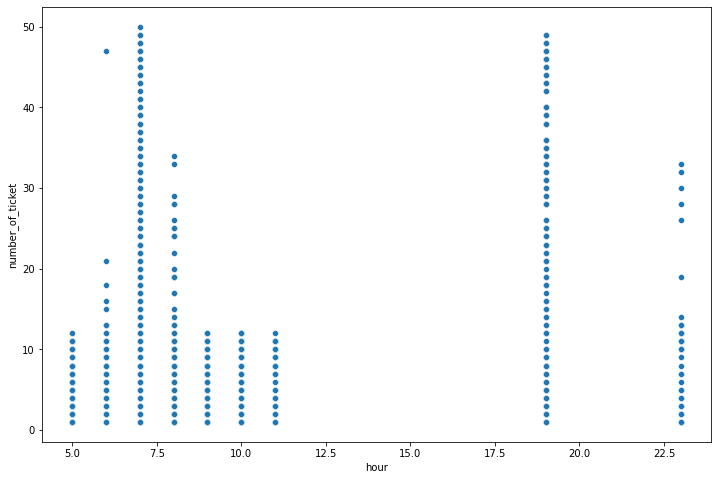

In [ ]:
#visualization of hour & number_of_ticket using scaterplot
plt.figure(figsize=(12,8))

sns.scatterplot(x='hour', y="number_of_ticket", data=ready_data)

In [ ]:
#  summary from the above plot:
# We can see that most of the ticktes were sold at 7 AM and 8 PM. And that seems true because in the morning most of the people go to the work and office.

# From the above we can say that there is not ride between 12pm to 5.30Pm

In [ ]:
# Calculating total travel time

ready_data["travel_time"] = ready_data["travel_time"].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)
ready_data["travel_time"] 

0        7.250000
1        7.200000
2        7.083333
3        7.166667
4        7.200000
          ...    
6244    23.166667
6245     7.083333
6246     7.150000
6247     8.000000
6248     5.166667
Name: travel_time, Length: 6249, dtype: float64

In [ ]:
# splitting time period into AM, MID, Evening & PM

ready_data['period'] = np.nan

ready_data.loc[ready_data.travel_time < 7, 'period'] = 'em'
ready_data.loc[(ready_data.travel_time >= 7) & (ready_data.travel_time < 11), 'period'] = 'am'
ready_data.loc[(ready_data.travel_time >= 11) & (ready_data.travel_time < 15), 'period'] = 'mid'
ready_data.loc[(ready_data.travel_time >= 15) & (ready_data.travel_time < 19), 'period'] = 'eve'
ready_data.loc[(ready_data.travel_time >= 19) & (ready_data.travel_time <= 24), 'period'] = 'pm'

In [ ]:
ready_data.head() # returns the first 5 rows of the dataset

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,period
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10,am
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11,am
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11,am
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11,am
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11,am


In [ ]:
ridecount = dict(ready_data['period'].value_counts())
ridecount

{'am': 4888, 'em': 988, 'mid': 87, 'pm': 286}

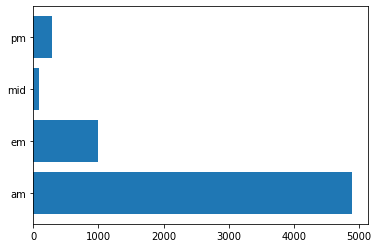

In [ ]:
import matplotlib.pyplot as plt

d={'am': 4888, 'em': 988, 'mid': 87, 'pm': 286}
timezone = list(d.keys())
no_of_people= list(d.values())

plt.barh(range(len(d)),no_of_people, tick_label=timezone)
plt.show()

In [ ]:
# creating column hourly travellers
ready_data['hourly_travelers'] = np.log1p(ready_data['period'].map(ridecount))
ready_data['hourly_travelers']

0       8.494743
1       8.494743
2       8.494743
3       8.494743
4       8.494743
          ...   
6244    5.659482
6245    8.494743
6246    8.494743
6247    8.494743
6248    6.896694
Name: hourly_travelers, Length: 6249, dtype: float64

In [ ]:
dcount = dict(ready_data["day_of_year"].value_counts())
dcount

In [ ]:
# creating a column daily travellers

In [ ]:
ready_data["daily_travelers"] = np.log1p(ready_data["day_of_year"].map(dcount))
ready_data.head()

In [ ]:
list(ready_data.columns) # returns the list of columns

['ride_id',
 'travel_date',
 'travel_time',
 'travel_from',
 'car_type',
 'max_capacity',
 'number_of_ticket',
 'date',
 'day_of_week',
 'day_of_year',
 'day_of_month',
 'year_woy',
 'hour',
 'minute',
 'is_weekend',
 'year',
 'quarter',
 'month',
 'period',
 'hourly_travelers',
 'daily_travelers']

In [ ]:
# these are the new columns that has been added
new_cols = ['day_of_year','daily_travelers','minute','day_of_month','hourly_travelers','is_weekend','day_of_week']

In [ ]:
# copying our data set into fav_data
fav_data=ready_data.copy()

In [ ]:
fav_data.head(3)

In [ ]:
fav_data.shape

In [ ]:
 #checking total number travelers in a month

In [ ]:
fav_data.month.value_counts() 

12    1050
2      985
1      896
3      853
4      600
11     414
9      262
7      254
8      251
10     247
6      225
5      212
Name: month, dtype: int64

In [ ]:
dict_cov = {12:1,2:1,1:1,2:1,4:2,11:2,9:3,7:3,8:3,10:3,6:3,5:3} # replacing the month values
fav_data['month'].replace(dict_cov,inplace=True)

In [ ]:
fav_data.month.value_counts()

1    2931
3    2304
2    1014
Name: month, dtype: int64

In [ ]:
fav_data.day_of_month.unique()    # checking unique days 

array([17, 19, 26, 27, 20, 18, 16, 15, 14, 13,  4, 28, 31, 30, 29, 25, 24,
       23, 22, 21, 12,  3,  2,  1])

In [ ]:
conv_dict = {17:2, 19:2, 26:3, 27:3, 20:2, 18:2, 16:2, 15:2, 14:2, 13:2,  4:1, 28:2, 31:3, 30:3, 29:3, 25:3, 24:3,
       23:3, 22:3, 21:3, 12:1,  3:1,  2:1,  1:2}                                # replacing the day values
fav_data['day_of_month'].replace(conv_dict,inplace=True)

In [ ]:
fav_data['day_of_month'].value_counts()

1    2496
2    2305
3    1448
Name: day_of_month, dtype: int64

In [ ]:
# now let us check our dataset
fav_data.head()

In [ ]:
# Let us find the difference between next and previous buses
# And count the travel per minut trip
def find_difference_bw_bus(data):
  
  data.sort_values(["travel_from","date"],inplace=True,ascending=True)
  data["Time_gap_btw_0_1_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_1_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-3)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(3)).dt.total_seconds()/3600
  data["Time_gap_btw_next_previous_bus"]=(data.groupby(["travel_from"]).date.shift(-1)-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  cols=["Time_gap_btw_0_1_next_bus", "Time_gap_btw_0_1_previous_bus", "Time_gap_btw_0_2_next_bus","Time_gap_btw_0_2_previous_bus",
      "Time_gap_btw_0_3_next_bus", "Time_gap_btw_0_3_previous_bus",
      "Time_gap_btw_next_previous_bus"]
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="ffill")
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="backfill")

  
  return data

In [ ]:
good_data= find_difference_bw_bus(fav_data) # calling the fucntion 

In [ ]:
good_data.isnull().sum()  # checking for null values

In [ ]:
#We see that there are some null values present in the dataset so let us reomove those null values

In [ ]:
good_data.dropna(inplace=True) # droping null values

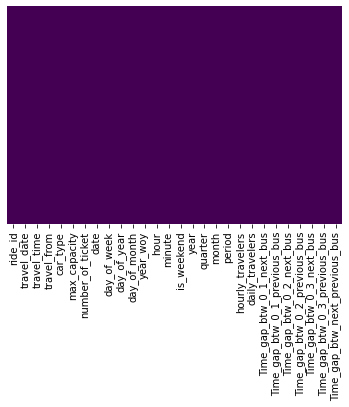

In [ ]:
### finding the null values with the help of heatmap

sns.heatmap(good_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
# now we dont have any null values in our dataset
# let us confrim it again
good_data.isnull().sum() 

In [ ]:
# there is no null values in our dataset(good_data)
good_data.head() # returns the first 5 rows of the dataset

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,...,period,hourly_travelers,daily_travelers,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus,Time_gap_btw_0_2_next_bus,Time_gap_btw_0_2_previous_bus,Time_gap_btw_0_3_next_bus,Time_gap_btw_0_3_previous_bus,Time_gap_btw_next_previous_bus
502,6654,05-12-17,7.133333,Awendo,Bus,49,2,2017-05-12 07:08:00,4,132,...,am,8.494743,4.025352,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667
5530,12926,01-04-18,7.133333,Awendo,Bus,49,20,2018-01-04 07:08:00,3,4,...,am,8.494743,3.526361,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667
5533,12929,01-04-18,7.200000,Awendo,Bus,49,2,2018-01-04 07:12:00,3,4,...,am,8.494743,3.526361,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333
5539,12935,01-04-18,7.216667,Awendo,Bus,49,9,2018-01-04 07:13:00,3,4,...,am,8.494743,3.526361,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000
5528,12924,01-04-18,8.000000,Awendo,Bus,49,15,2018-01-04 08:00:00,3,4,...,am,8.494743,3.526361,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667


**CORRELATION**

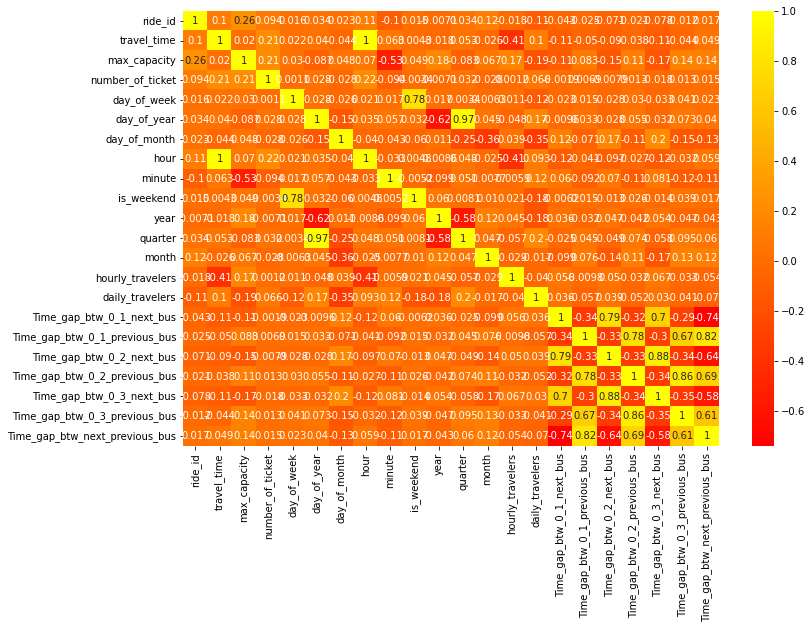

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))# checking the correlation of all the variables that we are having 
sns.heatmap(good_data.corr(), annot= True, cmap= "autumn",ax=ax)
# plt.figure(figsize=(8,6))

### **Encoding Categorical features**

In [ ]:
from sklearn import preprocessing #Import LabelEncoder
data = pd.get_dummies(good_data, columns=['travel_from','day_of_month','month'])
label_enc = {'Bus':1,'shuttle':0}
data.replace(label_enc,inplace=True)

In [ ]:
data

### Training the models

In [ ]:

keys= ["ride_id"]
Target_name="number_of_ticket"
not_used_cols=["ride_id","travel_time" ,"travel_date","date",'year_woy','max_capacity','number_of_ticket',
               'period'
]

In [ ]:
features = data.drop(not_used_cols,axis=1).columns # droping not used columns and naming it as features

In [ ]:
features.shape

(38,)

In [ ]:

data[features].head()

,car_type,day_of_week,day_of_year,hour,minute,is_weekend,year,quarter,hourly_travelers,daily_travelers,...,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,day_of_month_1,day_of_month_2,day_of_month_3,month_1,month_2,month_3
502,1,4,132,7,8,0,2017,2,8.494743,4.025352,...,0,0,0,0,1,0,0,0,0,1
5530,1,3,4,7,8,0,2018,1,8.494743,3.526361,...,0,0,0,0,1,0,0,1,0,0
5533,1,3,4,7,12,0,2018,1,8.494743,3.526361,...,0,0,0,0,1,0,0,1,0,0
5539,1,3,4,7,13,0,2018,1,8.494743,3.526361,...,0,0,0,0,1,0,0,1,0,0
5528,1,3,4,8,0,0,2018,1,8.494743,3.526361,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
## importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

### **Linear Regression**

In [ ]:
used_cols = ['day_of_year']

In [ ]:
list(data[features].columns) # returns the columns of the features

In [ ]:
prev_adjR2 = -0.01177282976168792
for col in features:
      used_cols.append(col)
dataset_pr = data[used_cols]  #  appending feature's columns to used_cols

In [ ]:
dataset_pr.shape # returns the shape of the data

In [ ]:
dataset_pr.head()  #returns the first 5 rows of the data

In [ ]:
dataset_pr=dataset_pr.loc[:,~dataset_pr.columns.duplicated()] # removes the duplicate columns in the dataset 

In [ ]:
dataset_pr.shape # there was only one duplicate column

(6246, 38)

In [ ]:
import math
from sklearn.linear_model import LinearRegression # importing linear regresiion  model from sklearn

In [ ]:
## define Matrix
def print_metrics(actual, predicted):
    print('MSE is {}'.format(mean_squared_error(actual, predicted)))
    print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
    print('RMSE is {}'.format(r2_score(actual, predicted)))
    print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
    print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [ ]:
# used_cols = ['day_of_year']
# prev_adjR2 = -0.01177282976168792
# for col in features:
#       used_cols.append(col)
# dataset_pr = data[used_cols]
X= dataset_pr.copy()
y = data['number_of_ticket']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
  # Predicting 
y_pred = model.predict(X_test)
  #Find R-squared value
r2 = r2_score(y_test, y_pred)
  # Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
if prev_adjR2<adj_r2:
    prev_adjR2 = adj_r2
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test,y_test)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
else:
    used_cols.pop()

print(f'r2:{r2}')
print(f'adj_r2:{adj_r2}')
print(f'prev_adjR2: {prev_adjR2}')
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print('Important features are: \n')
used_cols

r2:0.3542567926637149
adj_r2:0.3408844537651978
prev_adjR2: 0.3408844537651978
Train score: 0.41334959781428315
Test score: 0.3542567926637149
Important features are: 



['day_of_year',
 'car_type',
 'day_of_week',
 'day_of_year',
 'hour',
 'minute',
 'is_weekend',
 'year',
 'quarter',
 'hourly_travelers',
 'daily_travelers',
 'Time_gap_btw_0_1_next_bus',
 'Time_gap_btw_0_1_previous_bus',
 'Time_gap_btw_0_2_next_bus',
 'Time_gap_btw_0_2_previous_bus',
 'Time_gap_btw_0_3_next_bus',
 'Time_gap_btw_0_3_previous_bus',
 'Time_gap_btw_next_previous_bus',
 'travel_from_Awendo',
 'travel_from_Homa Bay',
 'travel_from_Kehancha',
 'travel_from_Keroka',
 'travel_from_Keumbu',
 'travel_from_Kijauri',
 'travel_from_Kisii',
 'travel_from_Mbita',
 'travel_from_Migori',
 'travel_from_Ndhiwa',
 'travel_from_Nyachenge',
 'travel_from_Rodi',
 'travel_from_Rongo',
 'travel_from_Sirare',
 'travel_from_Sori',
 'day_of_month_1',
 'day_of_month_2',
 'day_of_month_3',
 'month_1',
 'month_2',
 'month_3']

In [ ]:
# Test dataset metrics
print_metrics(y_test, y_test_pred)

MSE is 49.51661962811139
RMSE is 7.036804646152357
RMSE is 0.3542567926637149
MAE is 4.806223318336926
MAPE is 167.01432932694027


### **Implementing Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso # importing laasso from sklearn

In [ ]:
X= data[used_cols].copy()
y = data['number_of_ticket']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
alphas = [0.01,0.025,0.5,0.75,1]
for alpha in alphas:
    lasso  = Lasso(alpha=alpha , max_iter= 3000)
    lasso.fit(X_train, y_train)
    print('alpha: ',alpha)
    print('train Score: ',lasso.score(X_train, y_train))
    print('test Score: ',lasso.score(X_test, y_test))
  

alpha:  0.01
train Score:  0.4147638455428365
test Score:  0.349112048501917
alpha:  0.025
train Score:  0.40891474312851595
test Score:  0.34429620551592643
alpha:  0.5
train Score:  0.11856173727050756
test Score:  0.10026243164425519
alpha:  0.75
train Score:  0.05781590067941811
test Score:  0.048623957531518824
alpha:  1
train Score:  0.057103529254932894
test Score:  0.048188136154510564


In [ ]:
# We can see that alpha = 0.01 this gives us the best score

In [ ]:
lasso  = Lasso(alpha=0.01 , max_iter= 3000) # using the best value of alpha 
lasso.fit(X_train, y_train)  # after getting the alpha value we are going to train our model

Lasso(alpha=0.01, max_iter=3000)

In [ ]:
y_test_pred = lasso.predict(X_test)  # predicting
print(lasso.score(X_train,y_train)) # checking the performance of train data
print(lasso.score(X_test,y_test))  # checking the performance on test data


0.057103529254932894
0.048188136154510564


In [ ]:
#now checking the metrics
print_metrics(y_test, y_test_pred)

MSE is 71.43256072568549
RMSE is 8.451778553990012
RMSE is 0.048188136154510564
MAE is 5.957782161684967
MAPE is 224.0185677179617


### **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge # importing ridge regression from sklearn
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyperprarameter tuning

X= data[features].copy()
y = data['number_of_ticket']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.28467e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.15127e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.90173e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.30276e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -45.158626631106834


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test) # predicting 
print(ridge_regressor.score(X_train,y_train)) # checking the score of the train data
print(ridge_regressor.score(X_test,y_test))   # checking the score of the test data
print_metrics(y_test, y_test_pred)     # checking the error parts



-43.3355826173363
-48.747802909396945
MSE is 71.43256072568549
RMSE is 8.451778553990012
RMSE is 0.048188136154510564
MAE is 5.957782161684967
MAPE is 224.0185677179617


In [ ]:
r2 = r2_score(y_test, y_pred_ridge)  # checking r2 score
print(r2)

print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))  # adjusted r2

0.3504539572122357
Adjusted R2 :  0.3382528946190895


### **Training Gradient Boosting Regressor**

In [ ]:
used_cols = ['day_of_year']
prev_adjR2 = -0.01177282976168792
for col in features:
    used_cols.append(col)
    dataset_pr = data[used_cols]
    X= dataset_pr.copy()
    y = data['number_of_ticket']
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
    reg = GradientBoostingRegressor(random_state=0)
    reg.fit(X_train, y_train)
  # Predicting 
    y_pred = reg.predict(X_test)
    y_pred_train=reg.predict(X_train)
  

  # Find Adjusted R-squared value
    adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    if prev_adjR2<adj_r2:
        prev_adjR2 = adj_r2
 #Find R-squared value
    r2 = r2_score(y_test, y_pred)
    r2_for_train= r2_score(y_train,y_pred_train)
    train_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test,y_test)
else:
    used_cols.pop()

print(f'Adjust_r2: {prev_adjR2}')
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print(f'r2_Test score: {r2}')
print(f'r2_train score: {r2_for_train}')
print('Important features are: \n')
used_cols

Adjust_r2: 0.5897912571757781
Train score: 0.6576415024088764
Test score: 0.5871370850744232
r2_Test score: 0.5871370850744232
r2_train score: 0.6576415024088764
Important features are: 



['day_of_year',
 'car_type',
 'day_of_week',
 'day_of_year',
 'hour',
 'minute',
 'is_weekend',
 'year',
 'quarter',
 'hourly_travelers',
 'daily_travelers',
 'Time_gap_btw_0_1_next_bus',
 'Time_gap_btw_0_1_previous_bus',
 'Time_gap_btw_0_2_next_bus',
 'Time_gap_btw_0_2_previous_bus',
 'Time_gap_btw_0_3_next_bus',
 'Time_gap_btw_0_3_previous_bus',
 'Time_gap_btw_next_previous_bus',
 'travel_from_Awendo',
 'travel_from_Homa Bay',
 'travel_from_Kehancha',
 'travel_from_Keroka',
 'travel_from_Keumbu',
 'travel_from_Kijauri',
 'travel_from_Kisii',
 'travel_from_Mbita',
 'travel_from_Migori',
 'travel_from_Ndhiwa',
 'travel_from_Nyachenge',
 'travel_from_Rodi',
 'travel_from_Rongo',
 'travel_from_Sirare',
 'travel_from_Sori',
 'day_of_month_1',
 'day_of_month_2',
 'day_of_month_3',
 'month_1',
 'month_2']

In [ ]:
print_metrics(y_test, y_pred) # lets check the metrics for gradient boosting regressor

MSE is 30.98496285038142
RMSE is 5.566413823134373
RMSE is 0.5871370850744232
MAE is 3.6875155250497595
MAPE is 122.91257017663897


In [ ]:
data[used_cols].columns  # columns in used columns

Index(['day_of_year', 'car_type', 'day_of_week', 'day_of_year', 'hour',
       'minute', 'is_weekend', 'year', 'quarter', 'hourly_travelers',
       'daily_travelers', 'Time_gap_btw_0_1_next_bus',
       'Time_gap_btw_0_1_previous_bus', 'Time_gap_btw_0_2_next_bus',
       'Time_gap_btw_0_2_previous_bus', 'Time_gap_btw_0_3_next_bus',
       'Time_gap_btw_0_3_previous_bus', 'Time_gap_btw_next_previous_bus',
       'travel_from_Awendo', 'travel_from_Homa Bay', 'travel_from_Kehancha',
       'travel_from_Keroka', 'travel_from_Keumbu', 'travel_from_Kijauri',
       'travel_from_Kisii', 'travel_from_Mbita', 'travel_from_Migori',
       'travel_from_Ndhiwa', 'travel_from_Nyachenge', 'travel_from_Rodi',
       'travel_from_Rongo', 'travel_from_Sirare', 'travel_from_Sori',
       'day_of_month_1', 'day_of_month_2', 'day_of_month_3', 'month_1',
       'month_2'],
      dtype='object')

In [ ]:
import xgboost as xgb  # importing xgboost library 

In [ ]:
X = data[features].copy()
y = data['number_of_ticket'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
dreg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
dreg.fit(X_train, y_train)
y_pred_train=dreg.predict(X_train)
y_pred = dreg.predict(X_test)
#Find R-squared value
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
train_score = dreg.score(X_train, y_train)
test_score = dreg.score(X_test,y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print(f'r2:{r2}')
print(f'adj_r2:{adj_r2}')
print(f'r2_train:{r2_train}')


[04:39:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score: 0.8800956157960469
Test score: 0.6587693187171986
r2:0.6587693187171986
adj_r2:0.6523596469976007
r2_train:0.8800956157960469


### **Random Forest Regressor**

In [ ]:
#Importing required libraries
from sklearn import decomposition
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### **Random Forest Regressor**

In [ ]:
X = data[features].copy()     # independent variables
y = data['number_of_ticket'].copy()  # dependant variables

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)   # splitting our dataset into test and train

In [ ]:
dec_reg =RandomForestRegressor()

In [ ]:
dec_reg.fit(X_train,y_train)  # fitting our data

RandomForestRegressor()

In [ ]:
dec_reg.score(X_train,y_train) # checking the score of train data

0.9502727094689862

In [ ]:
dec_reg.score(X_test,y_test)   # checking the score of test data

0.6532506686993123

In [ ]:
# from this we can clearly say that our model is overfitted

### **grid search cv on Random forest**

In [ ]:
##defining Parameters
parameters = {  'ccp_alpha':[0.01,0.1,1,10,100],
              'max_depth': [4, 6, 8],
            'min_samples_leaf': [40, 50],
            'min_samples_split': [50, 100, 150]  
}

In [ ]:
X = data[features].copy()     # independent variables
y = data['number_of_ticket'].copy()    # dependant variables
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42) 
dec_reg =RandomForestRegressor()
rf_grid =GridSearchCV(dec_reg,param_grid=parameters, verbose=1,cv=2)
rf_grid.fit(X, y)                # fitting our data

Fitting 2 folds for each of 90 candidates, totalling 180 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150]},
             verbose=1)

In [ ]:
rf_grid.best_estimator_.get_params()   # getting the best parameter

{'bootstrap': True,
 'ccp_alpha': 0.01,
 'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf_optimal_model =rf_grid.best_estimator_
rf_train_preds = rf_optimal_model.predict(X_train)      # predicting y_train
rf_test_preds = rf_optimal_model.predict(X_test)        # predicting y_test
train_score= rf_optimal_model.score(X_train,y_train)    # checking the scores of train data
test_score = rf_optimal_model.score(X_test,y_test)      #checking the scores of test data

In [ ]:
#Find R-squared value
r2 = r2_score(y_test, rf_test_preds)       # r2 of test data
r2_train = r2_score(y_train, rf_train_preds)  # r2 of train data
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test,rf_test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))        # adjusted r2 test data

In [ ]:
# printing all the varibales that we have created above
print('Train Score: ',train_score)
print('Test Score: ',test_score)
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, rf_test_preds))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test, rf_test_preds))
print('Root Mean Squared Error (MSE): ',np.sqrt(mean_squared_error(y_test, rf_test_preds)))
print('R2 Score: ',r2)
print('R2_train Score: ',r2_train)
print('Adjusted R2 Score: ',adj_r2)

Train Score:  0.5862176887070771
Test Score:  0.5899220030768693
Mean Squared Error (MSE):  30.77595744513037
Mean Absolute Error (MAE):  3.578916977276364
Root Mean Squared Error (MSE):  5.547608263488904
R2 Score:  0.5899220030768693
R2_train Score:  0.5862176887070771
Adjusted R2 Score:  0.5822191044693167


In [ ]:
import warnings
warnings.filterwarnings('ignore')

### **Grid Search CV on XGboost algorithm**

In [ ]:
## import required libraries
import xgboost as xgb
from xgboost import XGBRegressor
xgb = xgb.XGBRegressor()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [ ]:
# defining Prameters 
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

In [ ]:
X = data[features].copy()             # independent variables
y = data['number_of_ticket'].copy()   # dependant variables

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)     # splitting our dataset into test and train

In [ ]:
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X, y)                     # fitting our data

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[04:43:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:10] WARNING: /workspace/src/objective/regre

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
                         'min_child_weight': [10, 20]},
             verbose=1)

In [ ]:
reg_gs.best_estimator_.get_params()   # getting the best parameter

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.004,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 7,
 'min_child_weight': 20,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
reg_optimal_model =reg_gs.best_estimator_
train_preds = reg_optimal_model.predict(X_train)     # predicting y_train
test_preds = reg_optimal_model.predict(X_test)       # predicting y_test
train_score=reg_optimal_model.score(X_train,y_train)             # checking the scores of trainn data
test_score=reg_optimal_model.score(X_test,y_test)               #checking the scores of test data

In [ ]:
#Find R-squared value
r2_test = r2_score(y_test, test_preds)   # r2 for test data

In [ ]:
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))  # r@  for adjusted data

In [ ]:
print('Train Score: ',train_score)
print('Test Score: ',test_score)
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, test_preds))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test, test_preds))
print('Root Mean Squared Error (MSE): ',np.sqrt(mean_squared_error(y_test, test_preds)))
print('r2_test: ',r2_test)
print('Adjusted R2 Score: ',adj_r2)

Train Score:  0.7926760210964964
Test Score:  0.7966823460998516
Mean Squared Error (MSE):  15.25879347642162
Mean Absolute Error (MAE):  2.588365228660585
Root Mean Squared Error (MSE):  3.9062505649819266
r2_test:  0.7966823460998516
Adjusted R2 Score:  0.7928632305050886


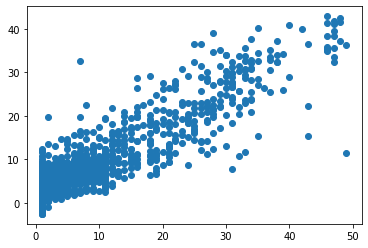

In [ ]:
plt.scatter(y_test,test_preds)    # plotes of actual value and the predicted value
from matplotlib import pyplot as plt


In [ ]:
# so now let us see the important feature based on our coefficient

In [ ]:
importances = reg_optimal_model.feature_importances_    # coefficients
print(importances)


[0.02026776 0.00449283 0.00615987 0.05909915 0.0255112  0.00406031
 0.00339914 0.00453848 0.01743842 0.00684263 0.01920095 0.02321673
 0.00879075 0.03824967 0.00858734 0.01510192 0.01251937 0.01499572
 0.1404808  0.02100244 0.03229455 0.         0.04303732 0.03916313
 0.02609548 0.13773178 0.00495558 0.03159855 0.00437729 0.01954485
 0.17214613 0.00414974 0.00309327 0.00473818 0.00626284 0.00559855
 0.00742847 0.00382876]


In [ ]:
list(X_train.columns)    # returns the columns in our dataset

['car_type',
 'day_of_week',
 'day_of_year',
 'hour',
 'minute',
 'is_weekend',
 'year',
 'quarter',
 'hourly_travelers',
 'daily_travelers',
 'Time_gap_btw_0_1_next_bus',
 'Time_gap_btw_0_1_previous_bus',
 'Time_gap_btw_0_2_next_bus',
 'Time_gap_btw_0_2_previous_bus',
 'Time_gap_btw_0_3_next_bus',
 'Time_gap_btw_0_3_previous_bus',
 'Time_gap_btw_next_previous_bus',
 'travel_from_Awendo',
 'travel_from_Homa Bay',
 'travel_from_Kehancha',
 'travel_from_Keroka',
 'travel_from_Keumbu',
 'travel_from_Kijauri',
 'travel_from_Kisii',
 'travel_from_Mbita',
 'travel_from_Migori',
 'travel_from_Ndhiwa',
 'travel_from_Nyachenge',
 'travel_from_Rodi',
 'travel_from_Rongo',
 'travel_from_Sirare',
 'travel_from_Sori',
 'day_of_month_1',
 'day_of_month_2',
 'day_of_month_3',
 'month_1',
 'month_2',
 'month_3']

In [ ]:
importance_dict = {'Feature' : list(X_train.columns),     # creating a dectionary of columns and coefficient 
                   'Feature Importance' : importances}


In [ ]:
importance_df = pd.DataFrame(importance_dict) # creating a dataframes of the dictionary that we are having
print(importance_df)

                           Feature  Feature Importance
0                         car_type            0.020268
1                      day_of_week            0.004493
2                      day_of_year            0.006160
3                             hour            0.059099
4                           minute            0.025511
5                       is_weekend            0.004060
6                             year            0.003399
7                          quarter            0.004538
8                 hourly_travelers            0.017438
9                  daily_travelers            0.006843
10       Time_gap_btw_0_1_next_bus            0.019201
11   Time_gap_btw_0_1_previous_bus            0.023217
12       Time_gap_btw_0_2_next_bus            0.008791
13   Time_gap_btw_0_2_previous_bus            0.038250
14       Time_gap_btw_0_3_next_bus            0.008587
15   Time_gap_btw_0_3_previous_bus            0.015102
16  Time_gap_btw_next_previous_bus            0.012519
17        

In [ ]:
# now let us sort the dataframe according to feature importance in decreasing order

In [ ]:
important_features=importance_df.sort_values(by=['Feature Importance'],ascending=False).head(20)  # taking 20 top features out of 39 features
print(important_features)

                           Feature  Feature Importance
30              travel_from_Sirare            0.172146
18            travel_from_Homa Bay            0.140481
25              travel_from_Migori            0.137732
3                             hour            0.059099
22             travel_from_Kijauri            0.043037
23               travel_from_Kisii            0.039163
13   Time_gap_btw_0_2_previous_bus            0.038250
20              travel_from_Keroka            0.032295
27           travel_from_Nyachenge            0.031599
24               travel_from_Mbita            0.026095
4                           minute            0.025511
11   Time_gap_btw_0_1_previous_bus            0.023217
19            travel_from_Kehancha            0.021002
0                         car_type            0.020268
29               travel_from_Rongo            0.019545
10       Time_gap_btw_0_1_next_bus            0.019201
8                 hourly_travelers            0.017438
15   Time_

In [ ]:
##Plotting the feature importance score 

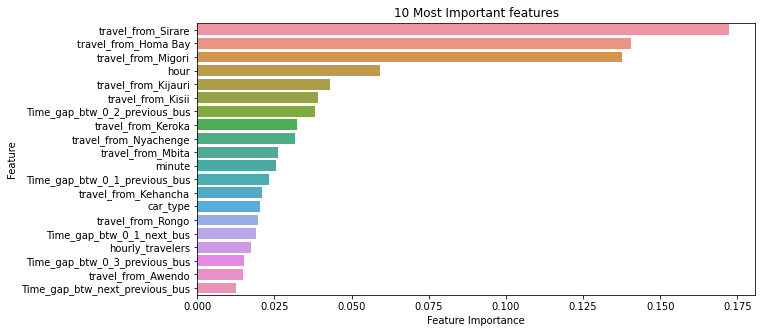

In [ ]:

plt.figure(figsize=(10,5))
sns.barplot(y = important_features['Feature'], x = important_features['Feature Importance'] )
plt.title('10 Most Important features')
plt.show()

## Conclusion

We used different types of regression algorithms to train our model like Linear Regression, Regularized linear regression (Ridge and Lasso), GBM, Random Forest Regressor, XGboost regressor. And also we tuned the parameters of Random forest regressor and XGboost regressor and also found the important features for training the model. Out of them XGboost with tuned hyperparameters gave the best result.
So the accuracy of our best model is 79% which can be said to be good for this large dataset.